**ADHITYA DWI NUGRAHA**

**Access the dataset through this link**

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# Import Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

# Reading Data

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Customer.csv')
geoloc = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Geolocation.csv')
ordit = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Order_Items.csv')
orpay = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Order_Payments.csv')
orrev = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Order_Reviews.csv')
order = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Orders.csv')
prodcat = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Product_Category_Name.csv')
product = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Products.csv')
seller = pd.read_csv('/content/drive/MyDrive/Dataset Assignment 5 SC/Sellers.csv')

In [ ]:
data_info = [customer, geoloc, ordit, orpay, orrev, order, prodcat, product, seller]

for i in data_info:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

In [ ]:
datasets = [customer, geoloc, ordit, orpay, orrev, order, prodcat, product, seller]
titles = ["customers", "geolocations", "items", "payments", "reviews", "orders", "product_category", "products", "sellers"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlOrRd')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,product_category,"product_category_name, product_category_name_english",71,2,0,0,
7,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
8,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,


# Merging Data

In [ ]:
df = customer.merge(right = order, how = 'left', on = 'customer_id')
df = df.merge(right = orpay, on = 'order_id')
df = df.merge(right = ordit, on = 'order_id')
df = df.merge(right = product, on = 'product_id')
df = df.merge(right = orrev, on = 'order_id')
df = df.merge(right = seller ,on = 'seller_id')
df = df.merge(right = prodcat, on = 'product_category_name')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,8577,itaquaquecetuba,SP,office_furniture


# Data Cleaning

In [ ]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0


In [ ]:
df['review_comment_title'].fillna(value = 'No Title', axis = 0, inplace = True)
df['review_comment_message'].fillna(value = 'No Message', axis = 0, inplace = True)
df.dropna(axis = 0, inplace = True)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,No Title,No Message,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,No Title,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,No Title,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,251191809e37c1cffc16865947c18a4d,3,No Title,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,f7123bac5b91a0e2e38d8b41fd1206f4,4,No Title,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,8577,itaquaquecetuba,SP,office_furniture


In [ ]:
print(df['customer_unique_id'].duplicated().sum())
print(df['customer_id'].duplicated().sum())
print(df['order_id'].duplicated().sum())

21728
18722
18722


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   order_id                       113193 non-null  object 
 6   order_status                   113193 non-null  object 
 7   order_purchase_timestamp       113193 non-null  object 
 8   order_approved_at              113193 non-null  object 
 9   order_delivered_carrier_date   113193 non-null  object 
 10  order_delivered_customer_date  113193 non-null  object 
 11  order_estimated_delivery_date  113193 non-null  object 
 12  payment_sequential            

# Filtering

In [ ]:
df = df[df['order_status']=='delivered']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113186 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113186 non-null  object 
 1   customer_unique_id             113186 non-null  object 
 2   customer_zip_code_prefix       113186 non-null  int64  
 3   customer_city                  113186 non-null  object 
 4   customer_state                 113186 non-null  object 
 5   order_id                       113186 non-null  object 
 6   order_status                   113186 non-null  object 
 7   order_purchase_timestamp       113186 non-null  object 
 8   order_approved_at              113186 non-null  object 
 9   order_delivered_carrier_date   113186 non-null  object 
 10  order_delivered_customer_date  113186 non-null  object 
 11  order_estimated_delivery_date  113186 non-null  object 
 12  payment_sequential            

# Exploratory Data Analysis

In [ ]:
df.describe().round(2).style.background_gradient()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,seller_zip_code_prefix
count,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000,113186.000000
mean,35086.140000,1.090000,2.940000,171.560000,1.200000,119.850000,20.000000,48.800000,784.730000,2.210000,2106.300000,30.280000,16.600000,23.100000,4.080000,24525.620000
std,29867.990000,0.690000,2.780000,264.210000,0.690000,181.080000,15.710000,10.020000,650.350000,1.720000,3765.310000,16.150000,13.440000,11.740000,1.350000,27649.700000
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1001.000000
25%,11310.000000,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,6429.000000
50%,24315.000000,1.000000,2.000000,107.960000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,13660.000000
75%,58865.000000,1.000000,4.000000,189.160000,1.000000,132.980000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,28495.000000
max,99980.000000,26.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99730.000000


In [ ]:
#Customer state ditribution
#customer_unique_id = unique identifier of a customer
cust_unik = df.drop_duplicates(subset = 'customer_unique_id')

#Grouping by customer state
cust_state = cust_unik.groupby('customer_state')['customer_unique_id'].count().reset_index()
cust_state = cust_state.rename(columns = {'customer_unique_id' : 'total_customer'}).sort_values(by = 'total_customer', ascending = False)

Text(0, 0.5, 'Total Pelanggan')

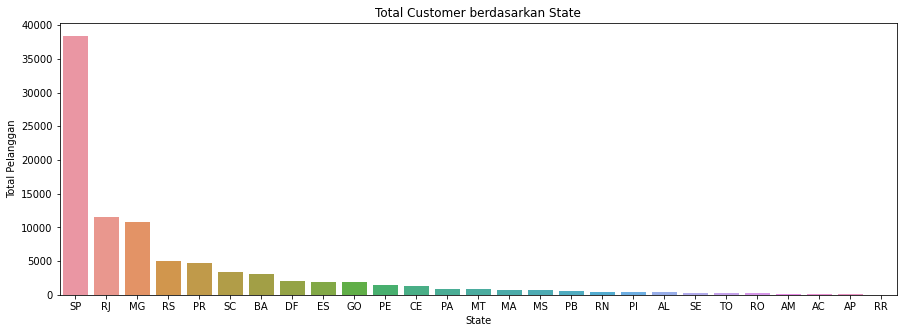

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = cust_state['customer_state'], y = cust_state['total_customer'])
plt.title('Total Customer berdasarkan State')
plt.xlabel('State')
plt.ylabel('Total Pelanggan')

Most of customers are come from Sau Paulo state. The gap is extremely high between Sao Paulo and Rio de Janeiro.

In [ ]:
#customer order distribution by hour
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
orderbyhour = df.groupby(df["order_purchase_timestamp"].dt.hour)["order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
orderbyhour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)

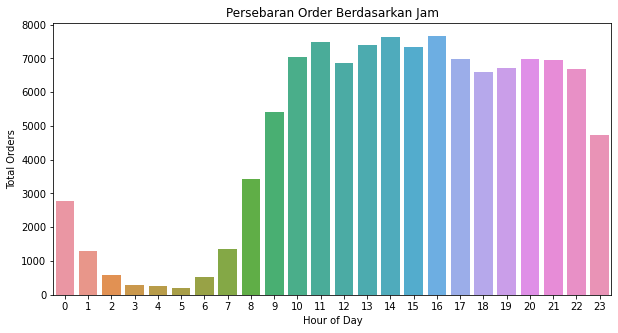

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Hour of Day", y="Total Orders", data=orderbyhour)
ax.set_title("Persebaran Order Berdasarkan Jam")
plt.show()

As you can see, from interval range of time between 00-07 am, number of orders are pretty low. Start from 05-11 am, number of orders are increasing. For interval range of time between 10am-10pm, number of orders are pretty high.

In [ ]:
#customer order distribution by day
orderbyday = df.groupby(df["order_purchase_timestamp"].dt.day_name())["order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
orderbyday.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)

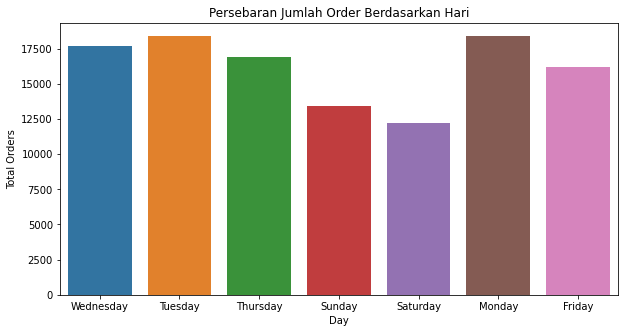

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Weekday Name", y="Total Orders", data=orderbyday)
ax.set_xlabel('Day')
ax.set_title("Persebaran Jumlah Order Berdasarkan Hari")
plt.show()

By the visualization, we can see that distribution of orders by day are well distributed along days in a week. Most of orders are come in Monday and the lowest one is in Saturday.

In [ ]:
#customer order distribution by month
orderbymonth = df.groupby(df["order_purchase_timestamp"].dt.month_name())["order_id"].count().reset_index()
orderbymonth.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Month Name"}, inplace=True)
orderbymonth = orderbymonth.sort_values(by="Total Orders", ascending=False)

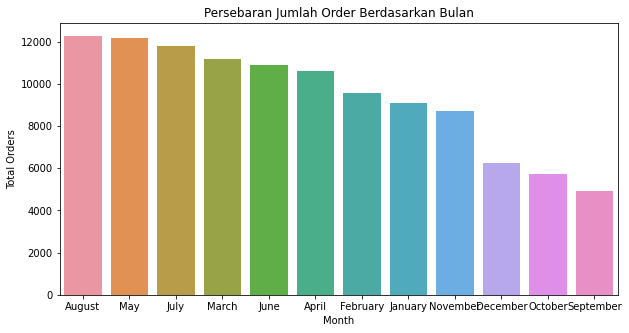

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Month Name", y="Total Orders", data=orderbymonth)
ax.set_xlabel('Month')
ax.set_title("Persebaran Jumlah Order Berdasarkan Bulan")
plt.show()

By the visualization, we can see that from January-August, number of orders are relatively increasing and pretty high amount if we compare by mean of number of orders between September-Desember.

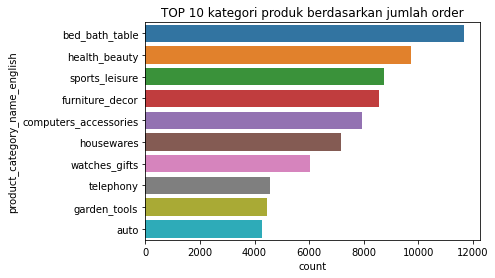

In [ ]:
#top 10 most sold product category 
top_category = df.groupby("product_category_name_english")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_category.rename(columns={"order_id":"count"}, inplace=True)
ax = sns.barplot(x="count", y="product_category_name_english", data=top_category[:10])
ax.set_title("TOP 10 kategori produk berdasarkan jumlah order")
plt.show()

By the visualization, we can see that bed_bath_table category is the most popular product category which is most of customer bought. We can maximize it to gain higher revenue.

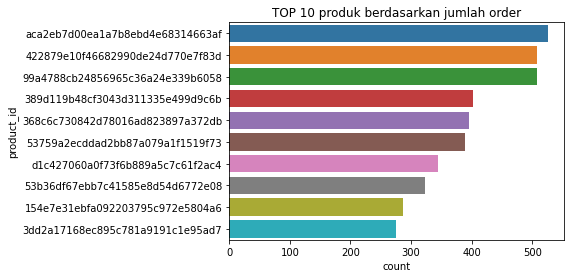

In [ ]:
#top 10 most sold product
top_prod = df.groupby("product_id")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_prod.rename(columns={"order_id":"count"}, inplace=True)
ax = sns.barplot(x="count", y="product_id", data=top_prod[:10])
ax.set_title("TOP 10 produk berdasarkan jumlah order")
plt.show()

By the visualization, we can clearly see that our top 3 products based on number of orders are:
1. aca2eb7d00ea1a7b8ebd4e68314663af
2. 422879e10f46682990de24d770e7f83d
3. 99a4788cb24856965c36a24e339b6058

credit_card    83527
boleto         22015
voucher         6022
debit_card      1622
Name: payment_type, dtype: int64


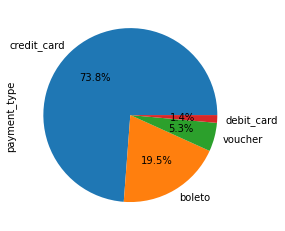

In [ ]:
#customer payment type distribution
print(df['payment_type'].value_counts())
df['payment_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

By the visualization, we can see that most of our customers are using credit card as a payment method, with percentages reach 73,8%.

In [ ]:
#top 10 product category berdasarkan review score
plt.figure(figsize=(12,12))
reviewscores = df.groupby("product_category_name_english")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
bestrated = reviewscores[reviewscores["count"]>=50][:10]
bestrated

,mean,count
product_category_name_english,,
books_imported,4.525424,59
books_general_interest,4.501838,544
small_appliances_home_oven_and_coffee,4.453333,75
costruction_tools_tools,4.415842,101
books_technical,4.400749,267
food_drink,4.387900,281
luggage_accessories,4.330420,1144
cine_photo,4.305556,72
fashion_shoes,4.272388,268


<Figure size 864x864 with 0 Axes>

Books_imported becomes our top 1 product category based on review score mean by our customers.

In [ ]:
#bottom 10 product category berdasarkan review score 
worstrated = reviewscores[reviewscores["count"]>=50].sort_values(by='mean')[:10]
worstrated

,mean,count
product_category_name_english,,
office_furniture,3.553204,1748
fashion_male_clothing,3.649635,137
fixed_telephony,3.756757,259
audio,3.845333,375
bed_bath_table,3.915354,11684
home_confort,3.927813,471
furniture_bedroom,3.941176,119
furniture_living_room,3.945525,514
furniture_decor,3.960019,8554


Office_furniture becomes our bottom 1 based on review score mean by our customers.

5    57.553938
4    19.270051
1    11.362713
3     8.421536
2     3.391762
Name: review_score, dtype: float64

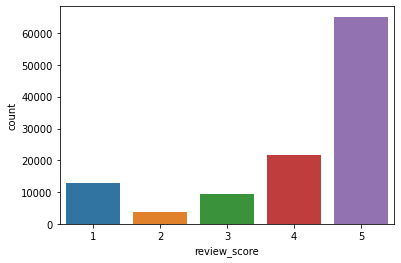

In [ ]:
#customer review score distribution
sns.countplot(df["review_score"])
df["review_score"].value_counts() / df["review_score"].count() * 100

Most of our customers are giving review score of 5 with 57% proportion.

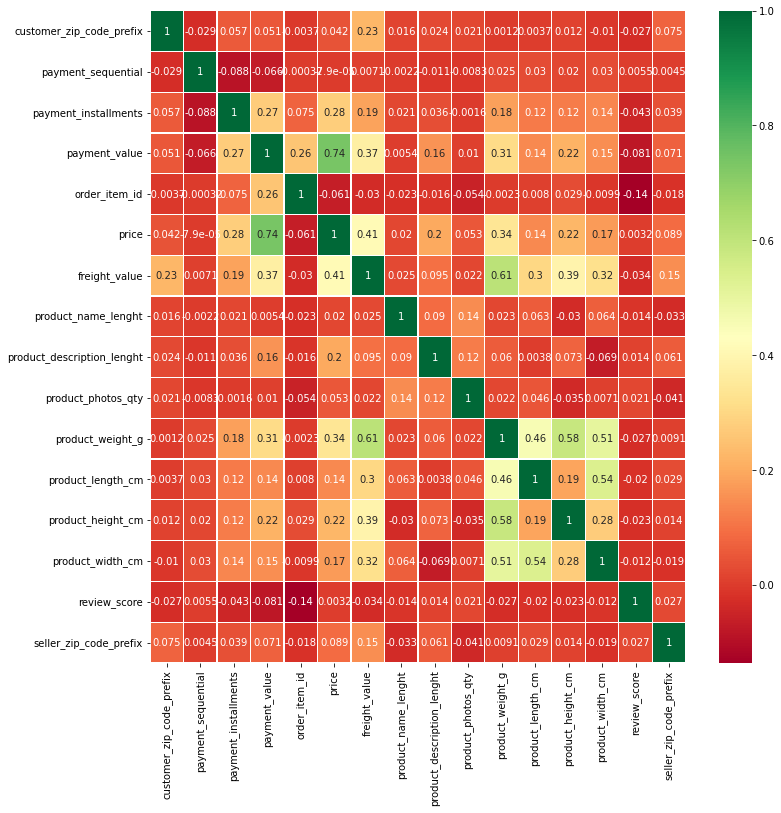

In [ ]:
#feature correlation
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Based on heat map for feature correlation, we clearly can see that there are no multicolinearity between our features. 

# Customer Segmentation

## RFM Analysis

In [ ]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

df[time_columns]=df[time_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113186 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113186 non-null  object        
 1   customer_unique_id             113186 non-null  object        
 2   customer_zip_code_prefix       113186 non-null  int64         
 3   customer_city                  113186 non-null  object        
 4   customer_state                 113186 non-null  object        
 5   order_id                       113186 non-null  object        
 6   order_status                   113186 non-null  object        
 7   order_purchase_timestamp       113186 non-null  datetime64[ns]
 8   order_approved_at              113186 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113186 non-null  datetime64[ns]
 10  order_delivered_customer_date  113186 non-null  datetime64[ns]
 11  

In [ ]:
snapshot_date = df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
print("Latest date in dataset + 1 day: ", snapshot_date)

Latest date in dataset + 1 day:  2018-08-30 15:00:37


In [ ]:
recency= pd.DataFrame(df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency['Recency']= recency['order_purchase_timestamp'].apply(lambda x: (snapshot_date - x).days)
recency.head()

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288


In [ ]:
frequency = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
monetary = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.columns = ['customer_unique_id', 'Monetary']
monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
RFM = recency.merge(frequency, on='customer_unique_id')
RFM = RFM.merge(monetary, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [ ]:
print(RFM.shape)
RFM.describe().T

(91459, 4)


,count,mean,std,min,25%,50%,75%,max
Recency,91459.0,237.069769,152.546629,1.00,114.00,218.00,345.00,695.00
Frequency,91459.0,1.032867,0.206215,1.00,1.00,1.00,1.00,14.00
Monetary,91459.0,212.316635,631.329419,9.59,63.85,112.84,202.76,109312.64


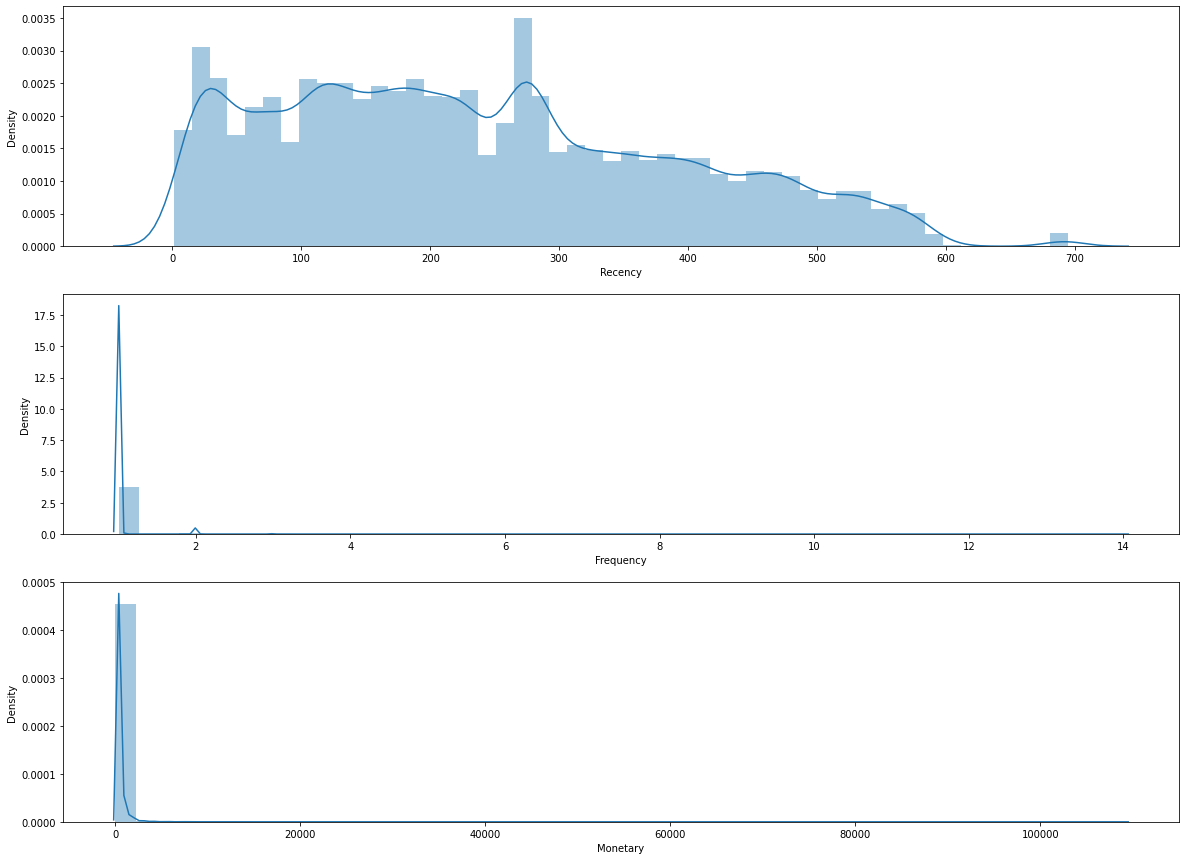

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'])
plt.show()

For recency, they are well distributed along x-axis. For frequency and monetary, they are relatively show skewness based on their value distribution.

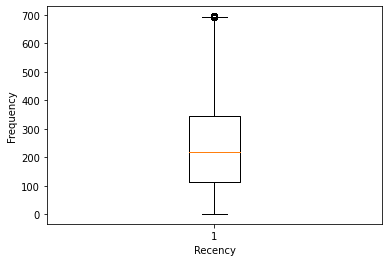

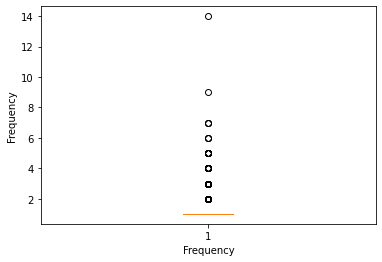

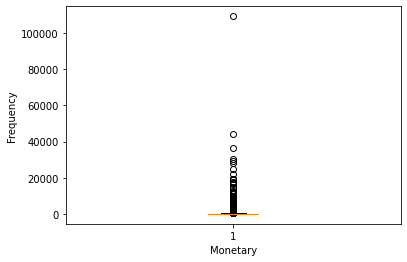

In [ ]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM[i])

In [ ]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2706
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   433,   462,   464,
              495,
            ...
            90864, 90878, 90934, 91034, 91038, 91105, 91196, 91297, 91313,
            91416],
           dtype='int64', length=2706)
****************************************
Number of outliers in Monetary column:  1003
Indexes:  Int64Index([  220,   254,   286,   411,   532,   564,   601,   607,   696,
              739,
            ...
            91115, 91120, 91144, 91192, 91236, 91287, 91307, 91368, 91448,
            91454],
           dtype='int64', length=1003)
****************************************


There are some outliers in frequency and monetary columns. We will remove it.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

for i in ["Recency", "Monetary"]:
    remove_outlier(RFM, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [ ]:
print(RFM.shape)
RFM_df= RFM.copy()
RFM_df= RFM_df.set_index('customer_unique_id')
RFM_df.head()

(90456, 4)


,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [ ]:
RFM_df["R"]  = pd.qcut(RFM_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df["F"]= pd.qcut(RFM_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df["M"] = pd.qcut(RFM_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

RFM_df['RFM_Concat'] = RFM_df.R.astype(str)+ RFM_df.F.astype(str) + RFM_df.M.astype(str)
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Concat
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214


In [ ]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating', 
    r'155|154|144|214|215|115|114|113': 'Cant Loose',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

RFM_df['Segment'] = RFM_df['R'].astype(str) + RFM_df['F'].astype(str) + RFM_df['M'].astype(str)
RFM_df['Segment'] = RFM_df['Segment'].replace(seg_map, regex=True)
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Concat,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,Lost
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,Hibernating
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,Cant Loose


For segmentation reference:

https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [ ]:
RFMStats = RFM_df[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                         Frequency             \
                          mean median  min  max  count      mean median min   
Segment                                                                       
About To Sleep      276.309936  278.0  177  381   5656  1.000354    1.0   1   
At Risk             385.291603  366.0  269  695  15600  1.040769    1.0   1   
Cant Loose          435.567308  437.0  269  695   5720  1.059790    1.0   1   
Champions            84.015373   80.0    1  176   5529  1.189003    1.0   1   
Hibernating         341.911046  325.0  177  694   8184  1.000000    1.0   1   
Lost                474.154717  468.0  382  695   4505  1.001998    1.0   1   
Loyal               177.501700  192.0    1  268   5882  1.089595    1.0   1   
Need Attention      155.274587  177.0    1  268   5572  1.000000    1.0   1   
New Customers       123.195730  126.0    1  268   5058  1.000000    1.0   1   
Potential Loyalist  130.116994  129.0    1  268  17112  1.017882    1.0   1   
Promising           105.158962   91.0    1  268  11638  1.000000    1.0   1   

                                 Monetary                                   
                   max  count        mean   median     min      max  count  
Segment                                                                     
About To Sleep       2   5656   52.576697   44.660   10.07   138.05   5656  
At Risk              6  15600  242.565358  160.770   55.62  1609.04  15600  
Cant Loose           4   5720  284.882427  198.950   88.74  1590.25   5720  
Champions           14   5529  360.386810  256.540  138.14  1608.36   5529  
Hibernating          1   8184   79.462797   75.080   11.63   138.08   8184  
Lost                 3   4505   45.091279   43.140   12.28    88.72   4505  
Loyal                7   5882  320.579779  233.020   88.83  1602.25   5882  
Need Attention       1   5572  232.490000  171.550   88.82  1599.88   5572  
New Customers        1   5058   52.751317   51.040    9.59    88.72   5058  
Potential Loyalist   3  17112   74.645776   70.490   10.89   138.08  17112  
Promising            1  11638  232.305686  162.855   14.06  1610.50  11638

In [ ]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                         Frequency             \
                          mean median  min  max  count      mean median min   
Segment                                                                       
About To Sleep      276.309936  278.0  177  381   5656  1.000354    1.0   1   
At Risk             385.291603  366.0  269  695  15600  1.040769    1.0   1   
Cant Loose          435.567308  437.0  269  695   5720  1.059790    1.0   1   
Champions            84.015373   80.0    1  176   5529  1.189003    1.0   1   
Hibernating         341.911046  325.0  177  694   8184  1.000000    1.0   1   
Lost                474.154717  468.0  382  695   4505  1.001998    1.0   1   
Loyal               177.501700  192.0    1  268   5882  1.089595    1.0   1   
Need Attention      155.274587  177.0    1  268   5572  1.000000    1.0   1   
New Customers       123.195730  126.0    1  268   5058  1.000000    1.0   1   
Potential Loyalist  130.116994  129.0    1  268  17112  1.017882    1.0   1   
Promising           105.158962   91.0    1  268  11638  1.000000    1.0   1   

                                 Monetary                                   \
                   max  count        mean   median     min      max  count   
Segment                                                                      
About To Sleep       2   5656   52.576697   44.660   10.07   138.05   5656   
At Risk              6  15600  242.565358  160.770   55.62  1609.04  15600   
Cant Loose           4   5720  284.882427  198.950   88.74  1590.25   5720   
Champions           14   5529  360.386810  256.540  138.14  1608.36   5529   
Hibernating          1   8184   79.462797   75.080   11.63   138.08   8184   
Lost                 3   4505   45.091279   43.140   12.28    88.72   4505   
Loyal                7   5882  320.579779  233.020   88.83  1602.25   5882   
Need Attention       1   5572  232.490000  171.550   88.82  1599.88   5572   
New Customers        1   5058   52.751317   51.040    9.59    88.72   5058   
Potential Loyalist   3  17112   74.645776   70.490   10.89   138.08  17112   
Promising            1  11638  232.305686  162.855   14.06  1610.50  11638   

                    Ratio  
                           
Segment                    
About To Sleep       6.25  
At Risk             17.25  
Cant Loose           6.32  
Champions            6.11  
Hibernating          9.05  
Lost                 4.98  
Loyal                6.50  
Need Attention       6.16  
New Customers        5.59  
Potential Loyalist  18.92  
Promising           12.87

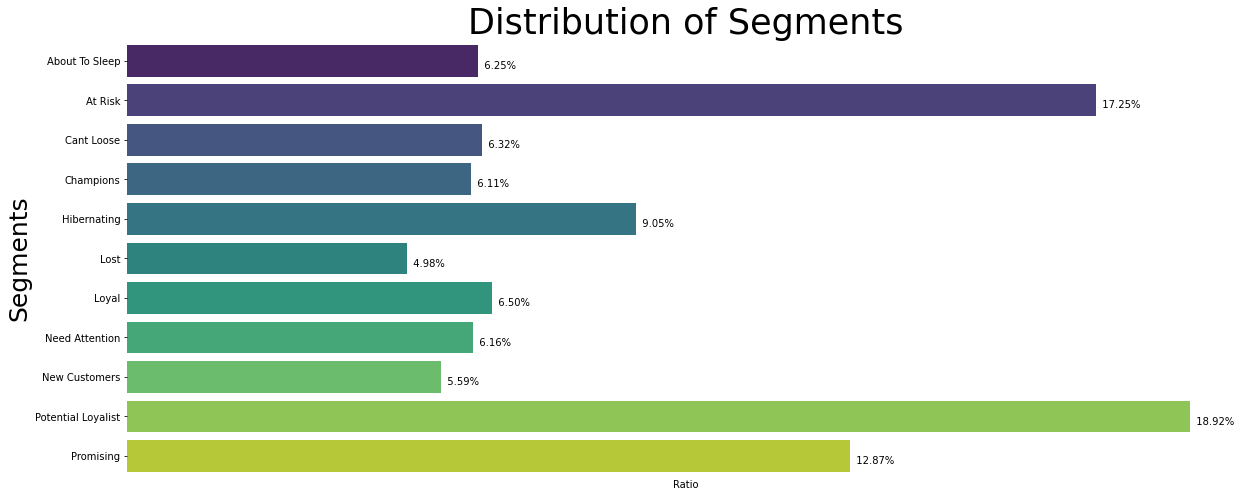

In [ ]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

As we can see, most of our customers are in "Potential Loyalist" segment, followed by "At Risk" segment. Total of "Hibernating","About To Sleep", and "Lost" segments are relatively high reaching 20%, which are our customers that potentially clustered as churn.

In [ ]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
RFMStats.index

Index(['About To Sleep', 'At Risk', 'Cant Loose', 'Champions', 'Hibernating',
       'Lost', 'Loyal', 'Need Attention', 'New Customers',
       'Potential Loyalist', 'Promising'],
      dtype='object', name='Segment')

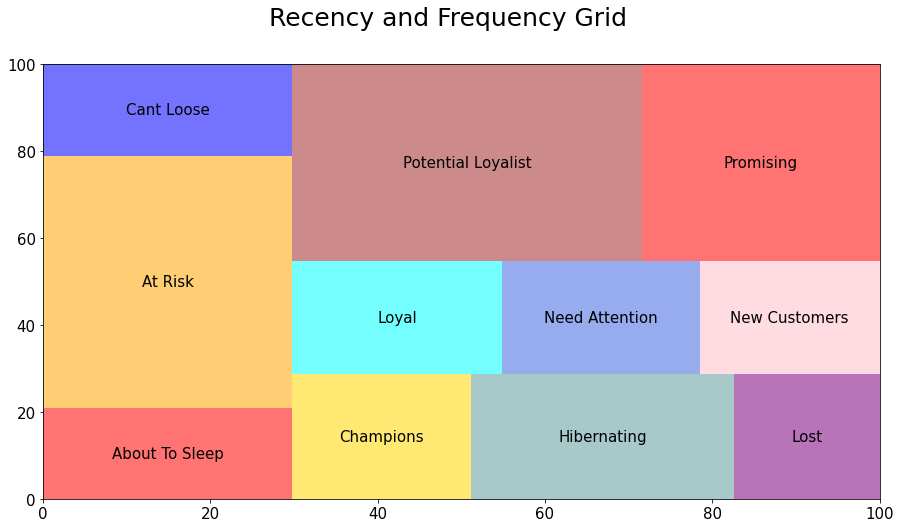

In [ ]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index, 
              color=["red","orange","blue", "gold", "cadetblue", "purple", "aqua","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25);

## K-Means Clustering

In [ ]:
rfm= RFM_df.drop(["R", "F", "M", "RFM_Concat", "Segment"], axis=1)
rfm.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


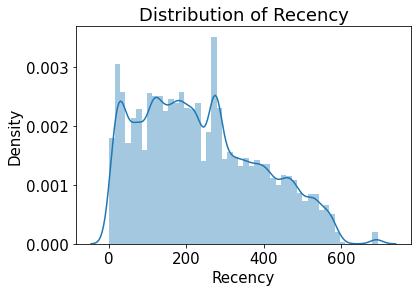

Recency's: Skew: 0.4501113357526811, : SkewtestResult(statistic=52.797588112007865, pvalue=0.0)


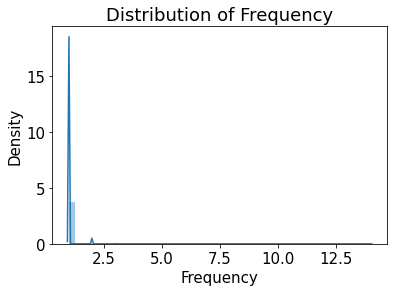

Frequency's: Skew: 10.354676834007211, : SkewtestResult(statistic=324.36013868210716, pvalue=0.0)


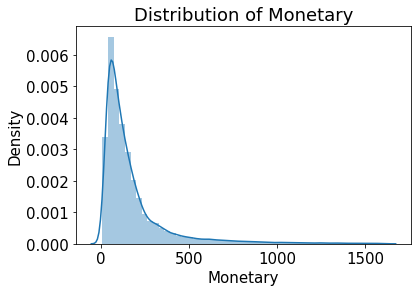

Monetary's: Skew: 3.1561493090129242, : SkewtestResult(statistic=206.70826262365105, pvalue=0.0)


In [ ]:
#check if data is skewed
from scipy import stats 
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

for col in rfm.columns:
    check_skew(rfm, col)

In [ ]:
rfm_log= rfm.copy()
for i in rfm_log.columns[1:]:
    rfm_log[i] = np.log10(rfm_log[i])

rfm_log.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,0.0,2.151982
0000b849f77a49e4a4ce2b2a4ca5be3f,115,0.0,1.434409
0000f46a3911fa3c0805444483337064,537,0.0,1.935608
0000f6ccb0745a6a4b88665a16c9f078,321,0.0,1.639686
0004aac84e0df4da2b147fca70cf8255,288,0.0,2.294224


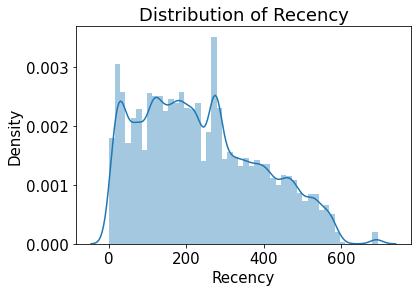

Recency's: Skew: 0.4501113357526811, : SkewtestResult(statistic=52.797588112007865, pvalue=0.0)


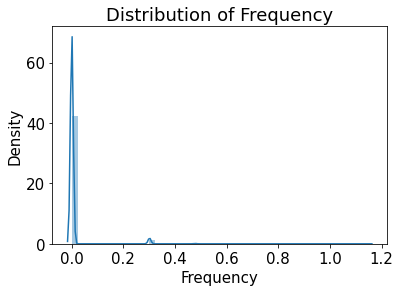

Frequency's: Skew: 6.141373632206548, : SkewtestResult(statistic=272.262884074649, pvalue=0.0)


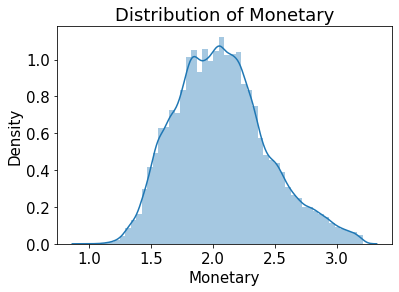

Monetary's: Skew: 0.4340050104374415, : SkewtestResult(statistic=51.05832179005935, pvalue=0.0)


In [ ]:
for col in rfm_log.columns:
    check_skew(rfm_log, col)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

rfm_log_scaled= scaler.fit_transform(rfm_log)
rfm_log_scaled_df= pd.DataFrame(rfm_log_scaled)
rfm_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
rfm_log_scaled_df.head()

,recency,frequency,monetary
0,-0.820214,-0.169157,0.219033
1,-0.800543,-0.169157,-1.706074
2,1.966468,-0.169157,-0.361456
3,0.550178,-0.169157,-1.155358
4,0.333800,-0.169157,0.600639


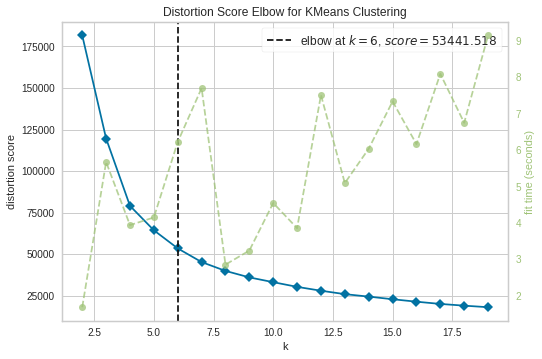

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(rfm_log_scaled_df)
elbow.show()

By K-Means clustering, we get number of cluster are 6 clusters. So, we will divide our customers to 6 clusters.

In [ ]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(rfm_log_scaled_df)

KMeans(n_clusters=6)

In [ ]:
rfm_log_scaled_df['Cluster']= kmeans.labels_
rfm_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,-0.820214,-0.169157,0.219033,0
1,-0.800543,-0.169157,-1.706074,1
2,1.966468,-0.169157,-0.361456,3
3,0.550178,-0.169157,-1.155358,3
4,0.333800,-0.169157,0.600639,5


In [ ]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [ ]:
df_rfm= rfm.copy()
df_rfm['Cluster'] = kmeans.labels_
df_rfm.head()

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1
0000f46a3911fa3c0805444483337064,537,1,86.22,3
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5


In [ ]:
rfm_clusters_stat(df_rfm).style.background_gradient(cmap='YlOrRd')

Text(0.5, 0.98, 'Segments of Customers')

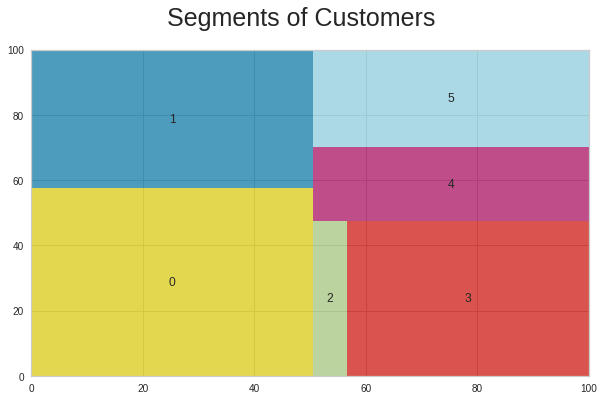

In [ ]:
rfm_stats= pd.DataFrame(rfm_clusters_stat(df_rfm))

# Visualize Clusters
plt.figure(figsize=(10, 6))
squarify.plot(sizes=rfm_stats["Monetary"]["count"], label=rfm_stats.index, color=["y","b","g","r","m", "c"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)

In [ ]:
cek = RFM_df.merge(df_rfm,how='right',on='customer_unique_id')

In [ ]:
cek.info()
cek.head()

<class 'pandas.core.frame.DataFrame'>
Index: 90456 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency_x    90456 non-null  int64   
 1   Frequency_x  90456 non-null  int64   
 2   Monetary_x   90456 non-null  float64 
 3   R            90456 non-null  category
 4   F            90456 non-null  category
 5   M            90456 non-null  category
 6   RFM_Concat   90456 non-null  object  
 7   Segment      90456 non-null  object  
 8   Recency_y    90456 non-null  int64   
 9   Frequency_y  90456 non-null  int64   
 10  Monetary_y   90456 non-null  float64 
 11  Cluster      90456 non-null  int32   
dtypes: category(3), float64(2), int32(1), int64(4), object(2)
memory usage: 6.8+ MB


,Recency_x,Frequency_x,Monetary_x,R,F,M,RFM_Concat,Segment,Recency_y,Frequency_y,Monetary_y,Cluster
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,Promising,112,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,New Customers,115,1,27.19,1
0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,Lost,537,1,86.22,3
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,Hibernating,321,1,43.62,3
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,Cant Loose,288,1,196.89,5


In [ ]:
lis = [0,1,2,3,4,5]
for i in lis:
  print(cek[cek['Cluster']==i]['Segment'].value_counts(normalize=True))

Promising             0.285839
Potential Loyalist    0.233816
Need Attention        0.171625
Loyal                 0.118464
Champions             0.101730
At Risk               0.040905
Hibernating           0.023450
About To Sleep        0.010814
Cant Loose            0.007134
New Customers         0.006223
Name: Segment, dtype: float64
Potential Loyalist    0.528935
New Customers         0.249226
About To Sleep        0.099495
Promising             0.074789
Hibernating           0.047091
Loyal                 0.000464
Name: Segment, dtype: float64
Champions             0.347776
At Risk               0.225077
Loyal                 0.183666
Cant Loose            0.124617
Potential Loyalist    0.115031
Lost                  0.003067
About To Sleep        0.000767
Name: Segment, dtype: float64
Hibernating           0.315459
Lost                  0.241170
At Risk               0.228986
About To Sleep        0.177563
Potential Loyalist    0.021202
Cant Loose            0.011165
New Custome

We check each of our clusters proportion to decide which cluster is said as churn cluster. We choose cluster 1 as churn cluster.

In [ ]:
def churnlabel(df):
  if df['Cluster']==1:
    return '1'
  else:
    return '0'

df_rfm['Churn'] = df_rfm.apply(churnlabel,axis=1)
df_rfm.head()

,Recency,Frequency,Monetary,Cluster,Churn
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,1
0000f46a3911fa3c0805444483337064,537,1,86.22,3,0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113186 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113186 non-null  object        
 1   customer_unique_id             113186 non-null  object        
 2   customer_zip_code_prefix       113186 non-null  int64         
 3   customer_city                  113186 non-null  object        
 4   customer_state                 113186 non-null  object        
 5   order_id                       113186 non-null  object        
 6   order_status                   113186 non-null  object        
 7   order_purchase_timestamp       113186 non-null  datetime64[ns]
 8   order_approved_at              113186 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113186 non-null  datetime64[ns]
 10  order_delivered_customer_date  113186 non-null  datetime64[ns]
 11  

In [ ]:
merged_data = df.merge(df_rfm,how='right',on='customer_unique_id')
merged_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,Recency,Frequency,Monetary,Cluster,Churn
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,2018-05-21 13:44:48,13405,piracicaba,SP,bed_bath_table,112,1,141.90,0,0
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,2018-05-11 22:29:25,2215,sao paulo,SP,health_beauty,115,1,27.19,1,1
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,2017-04-07 01:19:44,13232,campo limpo paulista,SP,stationery,537,1,86.22,3,0
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,2017-11-03 00:17:51,3569,sao paulo,SP,telephony,321,1,43.62,3,0
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,2017-12-02 22:29:35,12327,jacarei,SP,telephony,288,1,196.89,5,0


In [ ]:
merged_data.Churn.value_counts()

0    89213
1    20185
Name: Churn, dtype: int64

As we can see, 22% of our customers are churn in range of date as same as dataset records.

# Explore New Insight 

In [ ]:
merged_data['Churn'] = merged_data['Churn'].map({'1' : 1, '0' : 0})

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    109398 non-null  object        
 1   customer_unique_id             109398 non-null  object        
 2   customer_zip_code_prefix       109398 non-null  int64         
 3   customer_city                  109398 non-null  object        
 4   customer_state                 109398 non-null  object        
 5   order_id                       109398 non-null  object        
 6   order_status                   109398 non-null  object        
 7   order_purchase_timestamp       109398 non-null  datetime64[ns]
 8   order_approved_at              109398 non-null  datetime64[ns]
 9   order_delivered_carrier_date   109398 non-null  datetime64[ns]
 10  order_delivered_customer_date  109398 non-null  datetime64[ns]
 11  

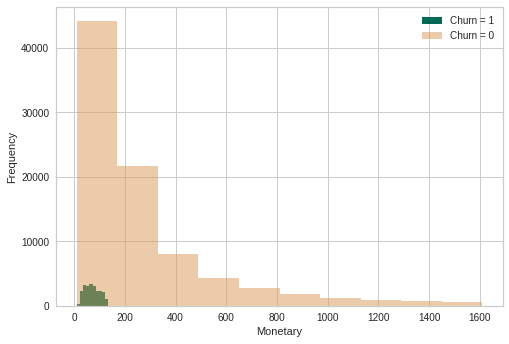

In [ ]:
#Churn customer distribution by monetary
merged_data[merged_data['Churn'] == 1].Monetary.plot(kind = 'hist', alpha = 1, color = '#016a55', label = 'Churn = 1')

merged_data[merged_data['Churn'] == 0].Monetary.plot(kind = 'hist', alpha = 0.5, color = '#d89955', label = 'Churn = 0')

plt.xlabel('Monetary')
plt.legend();

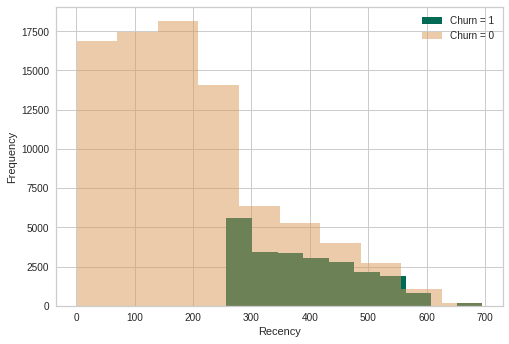

In [ ]:
#Churn customer distribution by recency
merged_data[merged_data['Churn'] == 1].Recency.plot(kind = 'hist', alpha = 1, color = '#016a55', label = 'Churn = 1')

merged_data[merged_data['Churn'] == 0].Recency.plot(kind = 'hist', alpha = 0.5, color = '#d89955', label = 'Churn = 0')

plt.xlabel('Recency')
plt.legend();

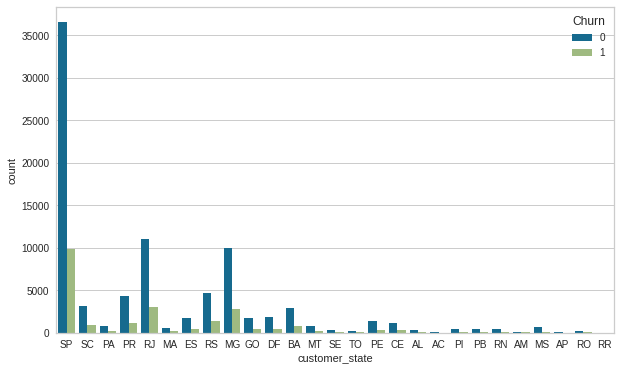

In [ ]:
#Churn customer distribution by customer state
plt.figure(figsize = (10, 6))

sns.countplot('customer_state', data = merged_data, hue = 'Churn');

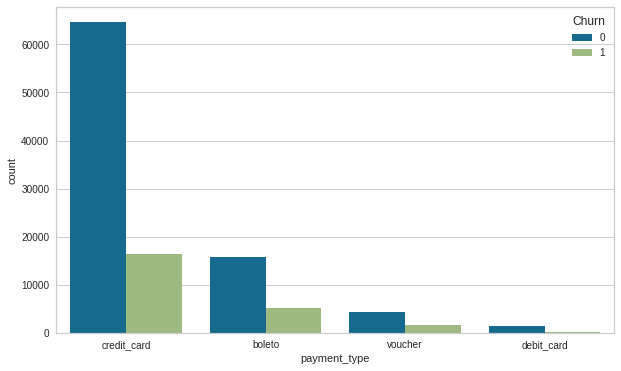

In [ ]:
#Churn customer distribution by payment type
plt.figure(figsize = (10, 6))

sns.countplot('payment_type', data = merged_data, hue = 'Churn');

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    109398 non-null  object        
 1   customer_unique_id             109398 non-null  object        
 2   customer_zip_code_prefix       109398 non-null  int64         
 3   customer_city                  109398 non-null  object        
 4   customer_state                 109398 non-null  object        
 5   order_id                       109398 non-null  object        
 6   order_status                   109398 non-null  object        
 7   order_purchase_timestamp       109398 non-null  datetime64[ns]
 8   order_approved_at              109398 non-null  datetime64[ns]
 9   order_delivered_carrier_date   109398 non-null  datetime64[ns]
 10  order_delivered_customer_date  109398 non-null  datetime64[ns]
 11  

In [ ]:
final_data =  merged_data.drop(merged_data.iloc[:,2:12],axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    109398 non-null  object        
 1   customer_unique_id             109398 non-null  object        
 2   payment_sequential             109398 non-null  int64         
 3   payment_type                   109398 non-null  object        
 4   payment_installments           109398 non-null  int64         
 5   payment_value                  109398 non-null  float64       
 6   order_item_id                  109398 non-null  int64         
 7   product_id                     109398 non-null  object        
 8   seller_id                      109398 non-null  object        
 9   shipping_limit_date            109398 non-null  datetime64[ns]
 10  price                          109398 non-null  float64       
 11  

In [ ]:
final_data = final_data.drop(final_data.iloc[:,7:10],axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    109398 non-null  object        
 1   customer_unique_id             109398 non-null  object        
 2   payment_sequential             109398 non-null  int64         
 3   payment_type                   109398 non-null  object        
 4   payment_installments           109398 non-null  int64         
 5   payment_value                  109398 non-null  float64       
 6   order_item_id                  109398 non-null  int64         
 7   price                          109398 non-null  float64       
 8   freight_value                  109398 non-null  float64       
 9   product_category_name          109398 non-null  object        
 10  product_name_lenght            109398 non-null  float64       
 11  

In [ ]:
final_data = final_data.drop(final_data.iloc[:,19:27],axis=1)
final_data = final_data.drop(columns=['product_category_name','review_id','customer_id'],axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_unique_id          109398 non-null  object 
 1   payment_sequential          109398 non-null  int64  
 2   payment_type                109398 non-null  object 
 3   payment_installments        109398 non-null  int64  
 4   payment_value               109398 non-null  float64
 5   order_item_id               109398 non-null  int64  
 6   price                       109398 non-null  float64
 7   freight_value               109398 non-null  float64
 8   product_name_lenght         109398 non-null  float64
 9   product_description_lenght  109398 non-null  float64
 10  product_photos_qty          109398 non-null  float64
 11  product_weight_g            109398 non-null  float64
 12  product_length_cm           109398 non-null  float64
 13  product_height

In [ ]:
prediksi = final_data.copy()

In [ ]:
final_data = final_data.drop('customer_unique_id',axis=1)

In [ ]:
#get dummy values for categorical column
final_data = pd.get_dummies(final_data)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 0 to 109397
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payment_sequential          109398 non-null  int64  
 1   payment_installments        109398 non-null  int64  
 2   payment_value               109398 non-null  float64
 3   order_item_id               109398 non-null  int64  
 4   price                       109398 non-null  float64
 5   freight_value               109398 non-null  float64
 6   product_name_lenght         109398 non-null  float64
 7   product_description_lenght  109398 non-null  float64
 8   product_photos_qty          109398 non-null  float64
 9   product_weight_g            109398 non-null  float64
 10  product_length_cm           109398 non-null  float64
 11  product_height_cm           109398 non-null  float64
 12  product_width_cm            109398 non-null  float64
 13  review_score  

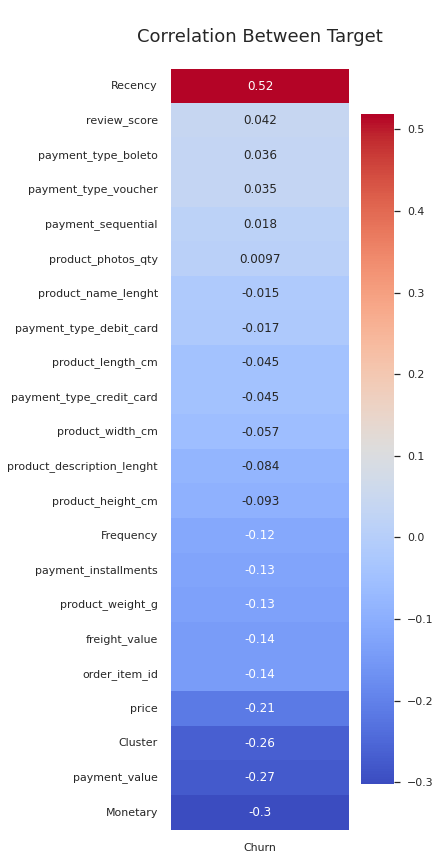

In [ ]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

corr_for_target(final_data, 'Churn', 'Correlation Between Target')

As we can see that recency has a highest correlation between our features with churn (target).

# Split Dataset

In [ ]:
X = final_data.drop('Churn',axis=1)
y = final_data['Churn']

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in whole dataset: {len(y)}')

Total # of sample in whole dataset: 109398
Total # of sample in whole dataset: 109398


# Model Building

In [ ]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.4 MB/s 
     |████████████████████████████████| 26.0 MB 77.3 MB/s 
     |████████████████████████████████| 300.3 MB 18 kB/s 
     |████████████████████████████████| 4.0 MB 61.4 MB/s 


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))

In [ ]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 1.0
Mean of the KNN model scores : 0.9702828198186619
Mean of the Decision Tree Clas. model scores : 1.0
Mean of the LightGBM model scores : 0.9999908592321756
Mean of the GBC model scores : 1.0
Mean of the Logistic Reg. model scores : 0.9438929183992399
Mean of the XGB model scores : 1.0


## LightGBM

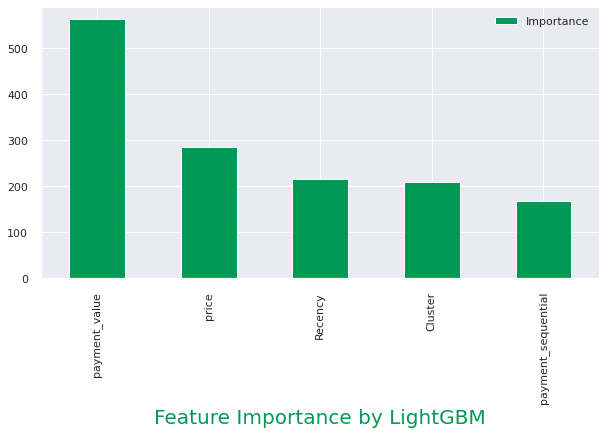

In [ ]:
#check feature importance
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)

In [ ]:
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, y_test)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, y_train)

print(f"LGBM accuracy score for test data {lgbm_test_as}")
print(f"LGBM accuracy score for train data {lgbm_train_as}")

LGBM accuracy score for test data 1.0
LGBM accuracy score for train data 1.0


In [ ]:
#use our important features to new model
X_train_new = X_train[['payment_value', 'price', 'Recency', 'Cluster','payment_sequential']]

X_test_new = X_test[['payment_value', 'price', 'Recency', 'Cluster','payment_sequential']]

In [ ]:
new_model_lgbm = LGBMClassifier()
new_model_lgbm.fit(X_train_new, y_train)

new_y_pred = new_model_lgbm.predict(X_test_new)
lgbm_ft_as = metrics.accuracy_score(new_y_pred, y_test)
#new model accuracy score for test data
lgbm_ft_as

1.0

In [ ]:
new_y_pred_train = new_model_lgbm.predict(X_train_new)
lgbm_ft_as_ = metrics.accuracy_score(new_y_pred_train, y_train)
#new model accuracy score for train data
lgbm_ft_as_

1.0

## Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [ ]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [ ]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.9503960999390616
Accuracy score for train data : 0.9485100159314686


In [ ]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     26121
           1       0.87      0.89      0.88      6699

    accuracy                           0.95     32820
   macro avg       0.92      0.93      0.92     32820
weighted avg       0.95      0.95      0.95     32820



In [ ]:
metrics.confusion_matrix(log_y_pred, y_test)

array([[25199,   922],
       [  706,  5993]])

In [ ]:
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[58510,  2212],
       [ 1731, 14125]])

In [ ]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

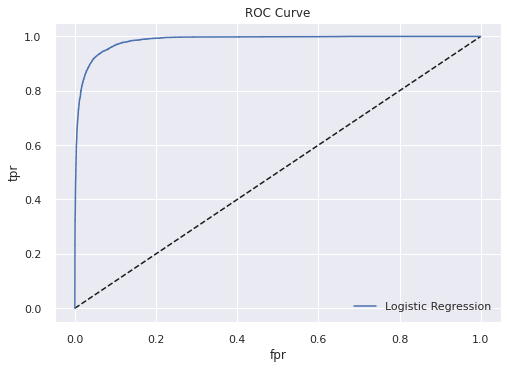

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [ ]:
metrics.roc_auc_score(y_test, y_proba_log)

0.9854674799726405

In [ ]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.9858351838921687

## KNN

In [ ]:
testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

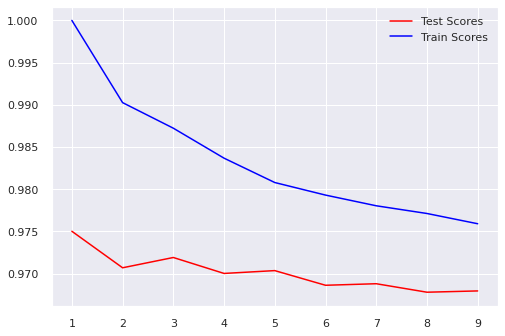

In [ ]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [ ]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [ ]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.9679463741620963
Accuracy score for train data : 0.9759069184361043


In [ ]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[25288,   617],
       [  435,  6480]])

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25905
           1       0.91      0.94      0.92      6915

    accuracy                           0.97     32820
   macro avg       0.95      0.96      0.95     32820
weighted avg       0.97      0.97      0.97     32820



In [ ]:
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

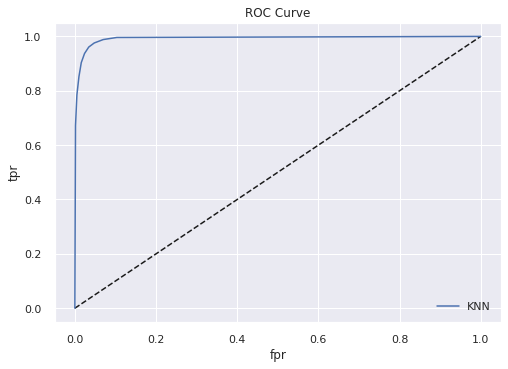

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [ ]:
metrics.roc_auc_score(y_test, y_proba)

0.9923978891112096

In [ ]:
metrics.confusion_matrix(y_pred_knn, y_test)

array([[25288,   435],
       [  617,  6480]])

## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [ ]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 1.0
Accuracy score for train data : 1.0


## Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [ ]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.9999695307739184
Accuracy score for train data : 1.0


In [ ]:
random_forest_ = RandomForestClassifier(100)
random_forest_.fit(X_train, y_train)

y_pred_rf_ = random_forest_.predict(X_test)
y_pred_train_rf_ = random_forest_.predict(X_train)

In [ ]:
rf_as_ = metrics.accuracy_score(y_test, y_pred_rf_)
rf_as_train_ = metrics.accuracy_score(y_train, y_pred_train_rf_)

print(f"Accuracy score for test data : {rf_as_}")
print(f"Accuracy score for train data : {rf_as_train_}")

Accuracy score for test data : 1.0
Accuracy score for train data : 1.0


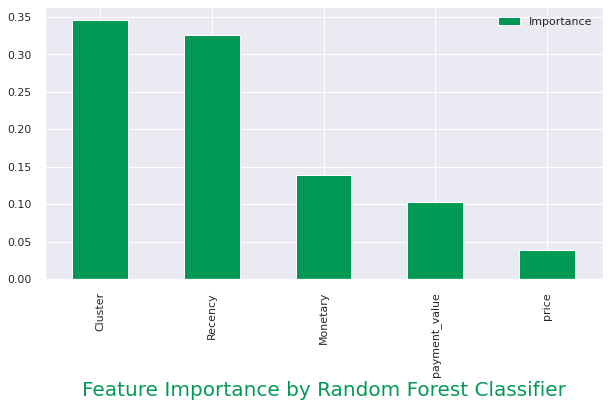

In [ ]:
#check feature importance by random forest
feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by Random Forest Classifier", color = "#019955", fontdict= {"fontsize" : 20});

In [ ]:
#use important features to new models
X_train_new_ = X_train[['Cluster','Recency','Monetary','payment_value','price']]
X_test_new_ = X_test[['Cluster','Recency','Monetary','payment_value','price']]

In [ ]:
random_forest_new = RandomForestClassifier()
random_forest_new.fit(X_train_new_, y_train)

y_pred_rf_new = random_forest_new.predict(X_test_new_)
y_pred_train_rf_new = random_forest_new.predict(X_train_new_)

In [ ]:
rf_as_new = metrics.accuracy_score(y_test, y_pred_rf_new)
rf_as_train_new = metrics.accuracy_score(y_train, y_pred_train_rf_new)

print(f"Accuracy score for test data : {rf_as_new}")
print(f"Accuracy score for train data : {rf_as_train_new}")

Accuracy score for test data : 1.0
Accuracy score for train data : 1.0


In [ ]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
#hyperparameter tunning for random forest
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

hgscv_rf = HalvingGridSearchCV(RandomForestClassifier(), params_grid, cv = 3, scoring = 'f1')
hgscv_rf.fit(X_train_sc, y_train)

HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(),
                    param_grid={'criterion': ['entropy', 'gini'],
                                'max_depth': [2, 4, 6, 8],
                                'min_samples_leaf': [2, 3, 5, 7],
                                'min_samples_split': [2, 4, 6, 8],
                                'n_estimators': [300, 400, 500]},
                    scoring='f1')

In [ ]:
hgscv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 400}

In [ ]:
#Model tunning with best parameters

rf_hgscv =RandomForestClassifier(n_estimators = 400, criterion = 'entropy', max_depth = 8, min_samples_split = 4, min_samples_leaf = 2)
rf_hgscv.fit(X_train_sc, y_train)

y_pred_hgsvc = rf_hgscv.predict(X_test_sc)
y_pred_hgsvc_train = rf_hgscv.predict(X_train_sc)

rf_hgscv_as = metrics.accuracy_score(y_test, y_pred_hgsvc)
rf_hgscv_train_as = metrics.accuracy_score(y_train, y_pred_hgsvc_train)

In [ ]:
print(f"Accuracy score for test data : {rf_hgscv_as}")
print(f"Accuracy score for train data : {rf_hgscv_train_as}")

Accuracy score for test data : 0.9999390615478367
Accuracy score for train data : 1.0


In [ ]:
metrics.confusion_matrix(y_test, y_pred_hgsvc)

array([[25905,     0],
       [    2,  6913]])

In [ ]:
metrics.confusion_matrix(y_train, y_pred_hgsvc_train)

array([[60241,     0],
       [    0, 16337]])

## XGBoost

In [ ]:
xg = XGBClassifier()
xg.fit(X_train_sc, y_train)

y_pred_xg = xg.predict(X_test_sc)

y_pred_xg_train = xg.predict(X_train_sc)

xg_as = metrics.accuracy_score(y_test, y_pred_xg)
xg_as_train = metrics.accuracy_score(y_train, y_pred_xg_train)

print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}")

Accuracy score of test data : 1.0
Accuracy score of train data : 1.0


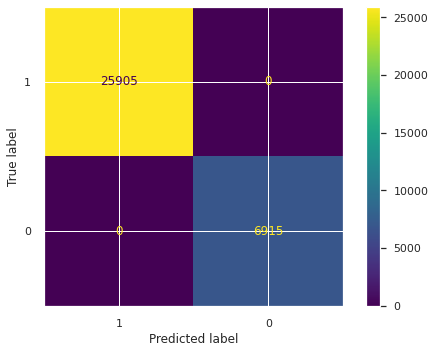

In [ ]:
metrics.plot_confusion_matrix(xg, X_test_sc, y_test, display_labels= [1, 0]);

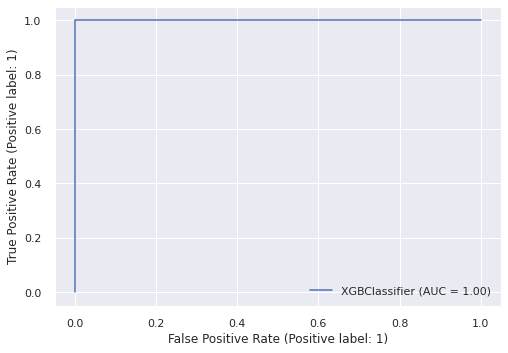

In [ ]:
metrics.plot_roc_curve(xg, X_test_sc, y_test);

In [ ]:
#hyperparameter tunning for XGBoost
parameters = {'learning_rate' : [0.01, 0.03, 0.05], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600]}

xg_hgrid = HalvingGridSearchCV(XGBClassifier(), parameters, cv = 5)
xg_hgrid.fit(X_train_sc, y_train)

HalvingGridSearchCV(estimator=XGBClassifier(),
                    param_grid={'learning_rate': [0.01, 0.03, 0.05],
                                'max_depth': [1, 4, 6],
                                'n_estimators': [100, 300, 400, 600]})

In [ ]:
xg_hgrid.best_score_

0.9999869392019853

In [ ]:
xg_hgrid.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 600}

In [ ]:
#Model tunning with best params
xg_hgridcv =XGBClassifier(learning_rate = 0.03, max_depth = 4, n_estimators = 600)

xg_hgridcv.fit(X_train_sc, y_train)

y_pred_xghgrid = xg_hgridcv.predict(X_test_sc)
y_pred_xghgrid_train = xg_hgridcv.predict(X_train_sc)

xg_as_hgrid = metrics.accuracy_score(y_test, y_pred_xghgrid)
xg_as_hgrid_train = metrics.accuracy_score(y_train, y_pred_xghgrid_train)

print(f"Accuracy score of test data : {xg_as_hgrid}")
print(f"Accuracy score of train data : {xg_as_hgrid_train}")

Accuracy score of test data : 1.0
Accuracy score of train data : 1.0


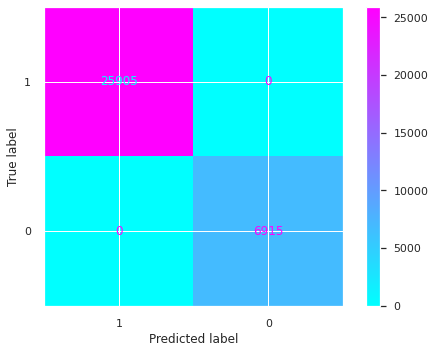

In [ ]:
metrics.plot_confusion_matrix(xg_hgridcv, X_test_sc, y_test, cmap = 'cool', display_labels = [1, 0]);

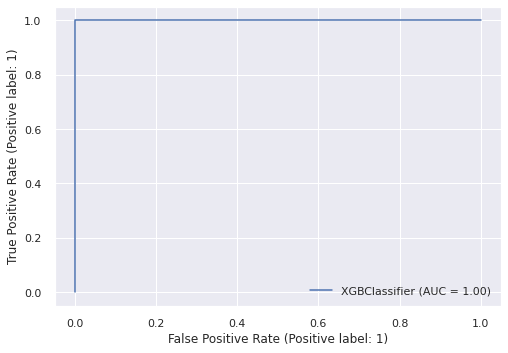

In [ ]:
metrics.plot_roc_curve(xg_hgridcv, X_test_sc, y_test);

## GradientBoost

In [ ]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train_sc, y_train)

y_pred_grad = grad_boost.predict(X_test_sc)
y_pred_grad_train = grad_boost.predict(X_train_sc)

grad_as = metrics.accuracy_score(y_test, y_pred_grad)
grad_as_train = metrics.accuracy_score(y_train, y_pred_grad_train)

print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}")

Accuracy score of test data : 1.0
Accuracy score of train data : 1.0


In [ ]:
#Hyperparameter tunning for GradienBoost
parameters_grad = {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600, 800]}

grad_hgrid = HalvingGridSearchCV(GradientBoostingClassifier(), parameters_grad, cv = 5, scoring = 'f1')

grad_hgrid.fit(X_train_sc, y_train)

HalvingGridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1],
                                'max_depth': [1, 4, 6],
                                'n_estimators': [100, 300, 400, 600, 800]},
                    scoring='f1')

In [ ]:
grad_hgrid.best_params_

{'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 800}

In [ ]:
grad_hgrid.best_score_

1.0

In [ ]:
#Model tunning with best parames

grad_hgrid_ = GradientBoostingClassifier(n_estimators = 800, max_depth = 1, learning_rate = 0.03)

grad_hgrid_.fit(X_train_sc, y_train)

y_pred_grad_hgrid = grad_hgrid_.predict(X_test_sc)
y_pred_grad_hgrid_train = grad_hgrid_.predict(X_train_sc)

grad_hgrid_as = metrics.accuracy_score(y_test, y_pred_grad_hgrid)
grad_hgrid_as_train = metrics.accuracy_score(y_train, y_pred_grad_hgrid_train)

print(f"Accuracy score of test data : {grad_hgrid_as}")
print(f"Accuracy score of train data : {grad_hgrid_as_train}")

Accuracy score of test data : 1.0
Accuracy score of train data : 1.0


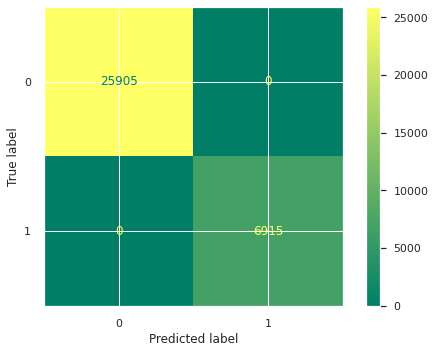

In [ ]:
metrics.plot_confusion_matrix(grad_hgrid_, X_test_sc, y_test, cmap = 'summer', display_labels = [0, 1]);

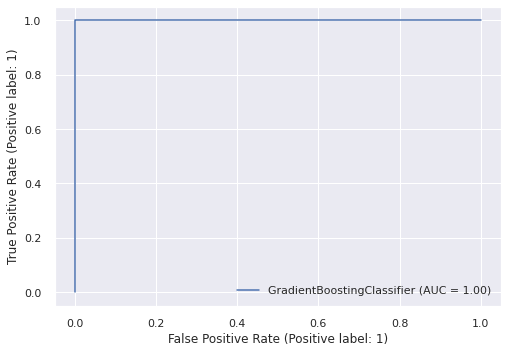

In [ ]:
metrics.plot_roc_curve(grad_hgrid_, X_test_sc, y_test);

## Logistic Regression w/ Scaled Data

In [ ]:
log_sc = LogisticRegression()
log_sc.fit(X_train_sc, y_train)

y_pred_log_sc = log_sc.predict(X_test_sc)
y_pred_log_sc_ = log_sc.predict(X_train_sc)

log_sc_as = metrics.accuracy_score(y_test, y_pred_log_sc)
log_sc_as_ = metrics.accuracy_score(y_train, y_pred_log_sc_)

print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}")

Accuracy score of test data : 0.9881779402803169
Accuracy score of train data : 0.9886129175481209


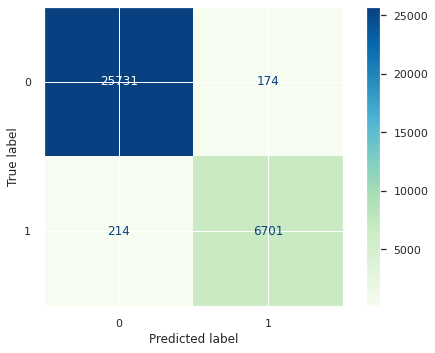

In [ ]:
metrics.plot_confusion_matrix(log_sc, X_test_sc, y_test, cmap = 'GnBu', display_labels = [0, 1]);

## Result

In [ ]:
print("Logistic Regression results : \n")
print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}\n")

print("------------------------------------------------")

print("KNN results : \n")
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}\n")

print("------------------------------------------------")

print("LGBM results without parameter importance : \n")
print(f"LGBM accuracy score for test data {lgbm_test_as}")
print(f"LGBM accuracy score for train data {lgbm_train_as}\n")
print("LGBM result with feature importance : \n")
print(f"LGBM accuracy score for test data {lgbm_ft_as}")
print(f"LGBM accuracy score for train data {lgbm_ft_as_}\n")

print("------------------------------------------------")

print("Decision Tree Classifier results with parameter importance : \n")
print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}\n")

print("------------------------------------------------")

print("Random Forest Classifier without parameter tunning : \n")
print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}\n")
print("Random Forest Classifier with parameter tunning : \n")
print(f"Accuracy score for test data : {rf_hgscv_as}")
print(f"Accuracy score for train data : {rf_hgscv_train_as}\n")

print("------------------------------------------------")

print("XGBoost results without parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}\n")
print("XGBoost results with parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as_hgrid}")
print(f"Accuracy score of train data : {xg_as_hgrid_train}\n")

print("------------------------------------------------")

print("Gradient Boosting Classifier results without parameter tunning : \n")
print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}\n")
print("Gradient Boosting Classifier results with parameter tunning : \n")
print(f"Accuracy score of test data : {grad_hgrid_as}")
print(f"Accuracy score of train data : {grad_hgrid_as_train}")

Logistic Regression results : 

Accuracy score of test data : 0.9881779402803169
Accuracy score of train data : 0.9886129175481209

------------------------------------------------
KNN results : 

Accuracy score for test data : 0.9679463741620963
Accuracy score for train data : 0.9759069184361043

------------------------------------------------
LGBM results without parameter importance : 

LGBM accuracy score for test data 1.0
LGBM accuracy score for train data 1.0

LGBM result with feature importance : 

LGBM accuracy score for test data 1.0
LGBM accuracy score for train data 1.0

------------------------------------------------
Decision Tree Classifier results with parameter importance : 

Accuracy score for test data : 1.0
Accuracy score for train data : 1.0

------------------------------------------------
Random Forest Classifier without parameter tunning : 

Accuracy score for test data : 0.9999695307739184
Accuracy score for train data : 1.0

Random Forest Classifier with param

# Prediction

In [ ]:
#We test our model to do prediction for our dataset
tes = prediksi.merge(final_data,how='left')

In [ ]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111336 entries, 0 to 111335
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_unique_id          111336 non-null  object 
 1   payment_sequential          111336 non-null  int64  
 2   payment_type                111336 non-null  object 
 3   payment_installments        111336 non-null  int64  
 4   payment_value               111336 non-null  float64
 5   order_item_id               111336 non-null  int64  
 6   price                       111336 non-null  float64
 7   freight_value               111336 non-null  float64
 8   product_name_lenght         111336 non-null  float64
 9   product_description_lenght  111336 non-null  float64
 10  product_photos_qty          111336 non-null  float64
 11  product_weight_g            111336 non-null  float64
 12  product_length_cm           111336 non-null  float64
 13  product_height

In [ ]:
#We choose XGBoost model to do prediction
import xgboost as xg
xgb_model = xg.XGBClassifier(learning_rate = 0.03, max_depth = 4, n_estimators = 600).fit(X_train,y_train)

In [ ]:
tes['probchurn'] = xgb_model.predict_proba(tes[X_train.columns])[:,1]

In [ ]:
#Result = churn probability for each customer
tes[['customer_unique_id','probchurn']]

,customer_unique_id,probchurn
0,0000366f3b9a7992bf8c76cfdf3221e2,0.000018
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.999972
2,0000f46a3911fa3c0805444483337064,0.000010
3,0000f6ccb0745a6a4b88665a16c9f078,0.000021
4,0004aac84e0df4da2b147fca70cf8255,0.000004
...,...,...
111331,fffb09418989a0dbff854a28163e47c6,0.000021
111332,fffea47cd6d3cc0a88bd621562a9d061,0.000015
111333,ffff371b4d645b6ecea244b27531430a,0.000004
111334,ffff5962728ec6157033ef9805bacc48,0.000014


In [ ]:
print('Highest user churn probability ', tes['probchurn'].max())
print('Lowest user churn probability', tes['probchurn'].min())

Highest user churn probability  0.9999746
Lowest user churn probability 3.982869e-06


In [ ]:
#Validation 
merged_data[['customer_unique_id','Churn']]

,customer_unique_id,Churn
0,0000366f3b9a7992bf8c76cfdf3221e2,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,0
3,0000f6ccb0745a6a4b88665a16c9f078,0
4,0004aac84e0df4da2b147fca70cf8255,0
...,...,...
109393,fffb09418989a0dbff854a28163e47c6,0
109394,fffea47cd6d3cc0a88bd621562a9d061,0
109395,ffff371b4d645b6ecea244b27531430a,0
109396,ffff5962728ec6157033ef9805bacc48,0


# Conclusion

From Brazilian E-Commerce Dataset by Olist, we do observation to analyze and generate churn probability for each customer in dataset. These are our results as following:
1. Based on RFM (Recency, Frequency, Monetary) score and K-Means Clustering, we divide our customer to 6 clusters. We decide cluster 1 as our churn customer based on cluster proportion. The rest of clusters are our customer who did not clustered as churn customer. There are 21,3% of our customers classified as churn customer in range of date following our dataset records.

2. When classifying customer churn or not, we use some features that we generate before, some of it are recency, frequency, and monetary of each customer. After we generate churn column/status for each customer, we do analysis for exploring new insight.

3. We set churn column as our target. We do modelling with our selected features as train data. We do test some models like Logistic Regression, Random Forest, XGBoost, etc to predict churn probability based on our features. In the end, we choose XGBoost model to predict our churn probability for each customer. Our model run well to predict churn probability of each customer.



# Recommendation

Since we already generate some features for our model to predict churn probability of each customer, we will give some recommendation based on it.
1. There are approx 21% of our customers are classified as churn. To decrease the probability, we need to reduce customer's recency, increase frequency, and increase monetary. To reach that, we suggest to do some method of advertisements and promotions based on our customer's cluster.

2. There are 6 clusters of customer. We suggest to analyze the characteristics of each cluster so the company can decide which approach/method will generate high revenue and decrease churn probability. As an example, for cluster 0, majority of customers are from "Promising","Potential Loyalists", and "Need Attention" segments. We can give them treats like promo for things that they usually buy, their behaviour like what payment type they use, etc. We hope that will at least uplift 1 segment level.

3. Overall, our customer segmentation distribution are pretty good for company. Proportion of our champion + loyal customers are 12% from total customers. Highest proportion is potential loyal and promosing customer with total of both is 30%. Retaining our champion and loyal customers is better than finding new customers. As we can see that, those segments provide higher revenue to the company than other segments. We suggest to don't disappoint our champion and loyal customers.

Hope our recommendation can provide or lead to high revenue and reduce churn probability of customer.

Best regard,

Adhitya Dwi Nugraha